In [ ]:
#  data analysis with python

In [1]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import mplcyberpunk
import warnings

warnings.filterwarnings("ignore")
pd.set_option("max_columns", 50) 
plt.style.use("cyberpunk") 

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 17
mpl.rcParams["axes.labelsize"] = 17
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

In [3]:
df = pd.read_csv("/storage/emulated/0/Telco-Customer-Churn.csv") 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
pd.DataFrame({"null/data":df.isnull().sum()/df.shape[0]}).sort_values("null/data",ascending=False)

null/data
customerID              0.0
DeviceProtection        0.0
TotalCharges            0.0
MonthlyCharges          0.0
PaymentMethod           0.0
PaperlessBilling        0.0
Contract                0.0
StreamingMovies         0.0
StreamingTV             0.0
TechSupport             0.0
OnlineBackup            0.0
gender                  0.0
OnlineSecurity          0.0
InternetService         0.0
MultipleLines           0.0
PhoneService            0.0
tenure                  0.0
Dependents              0.0
Partner                 0.0
SeniorCitizen           0.0
Churn                   0.0

In [18]:
df.duplicated().sum()

0

In [14]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

No     5174
Yes    1869
Name: Churn, dtype: int64

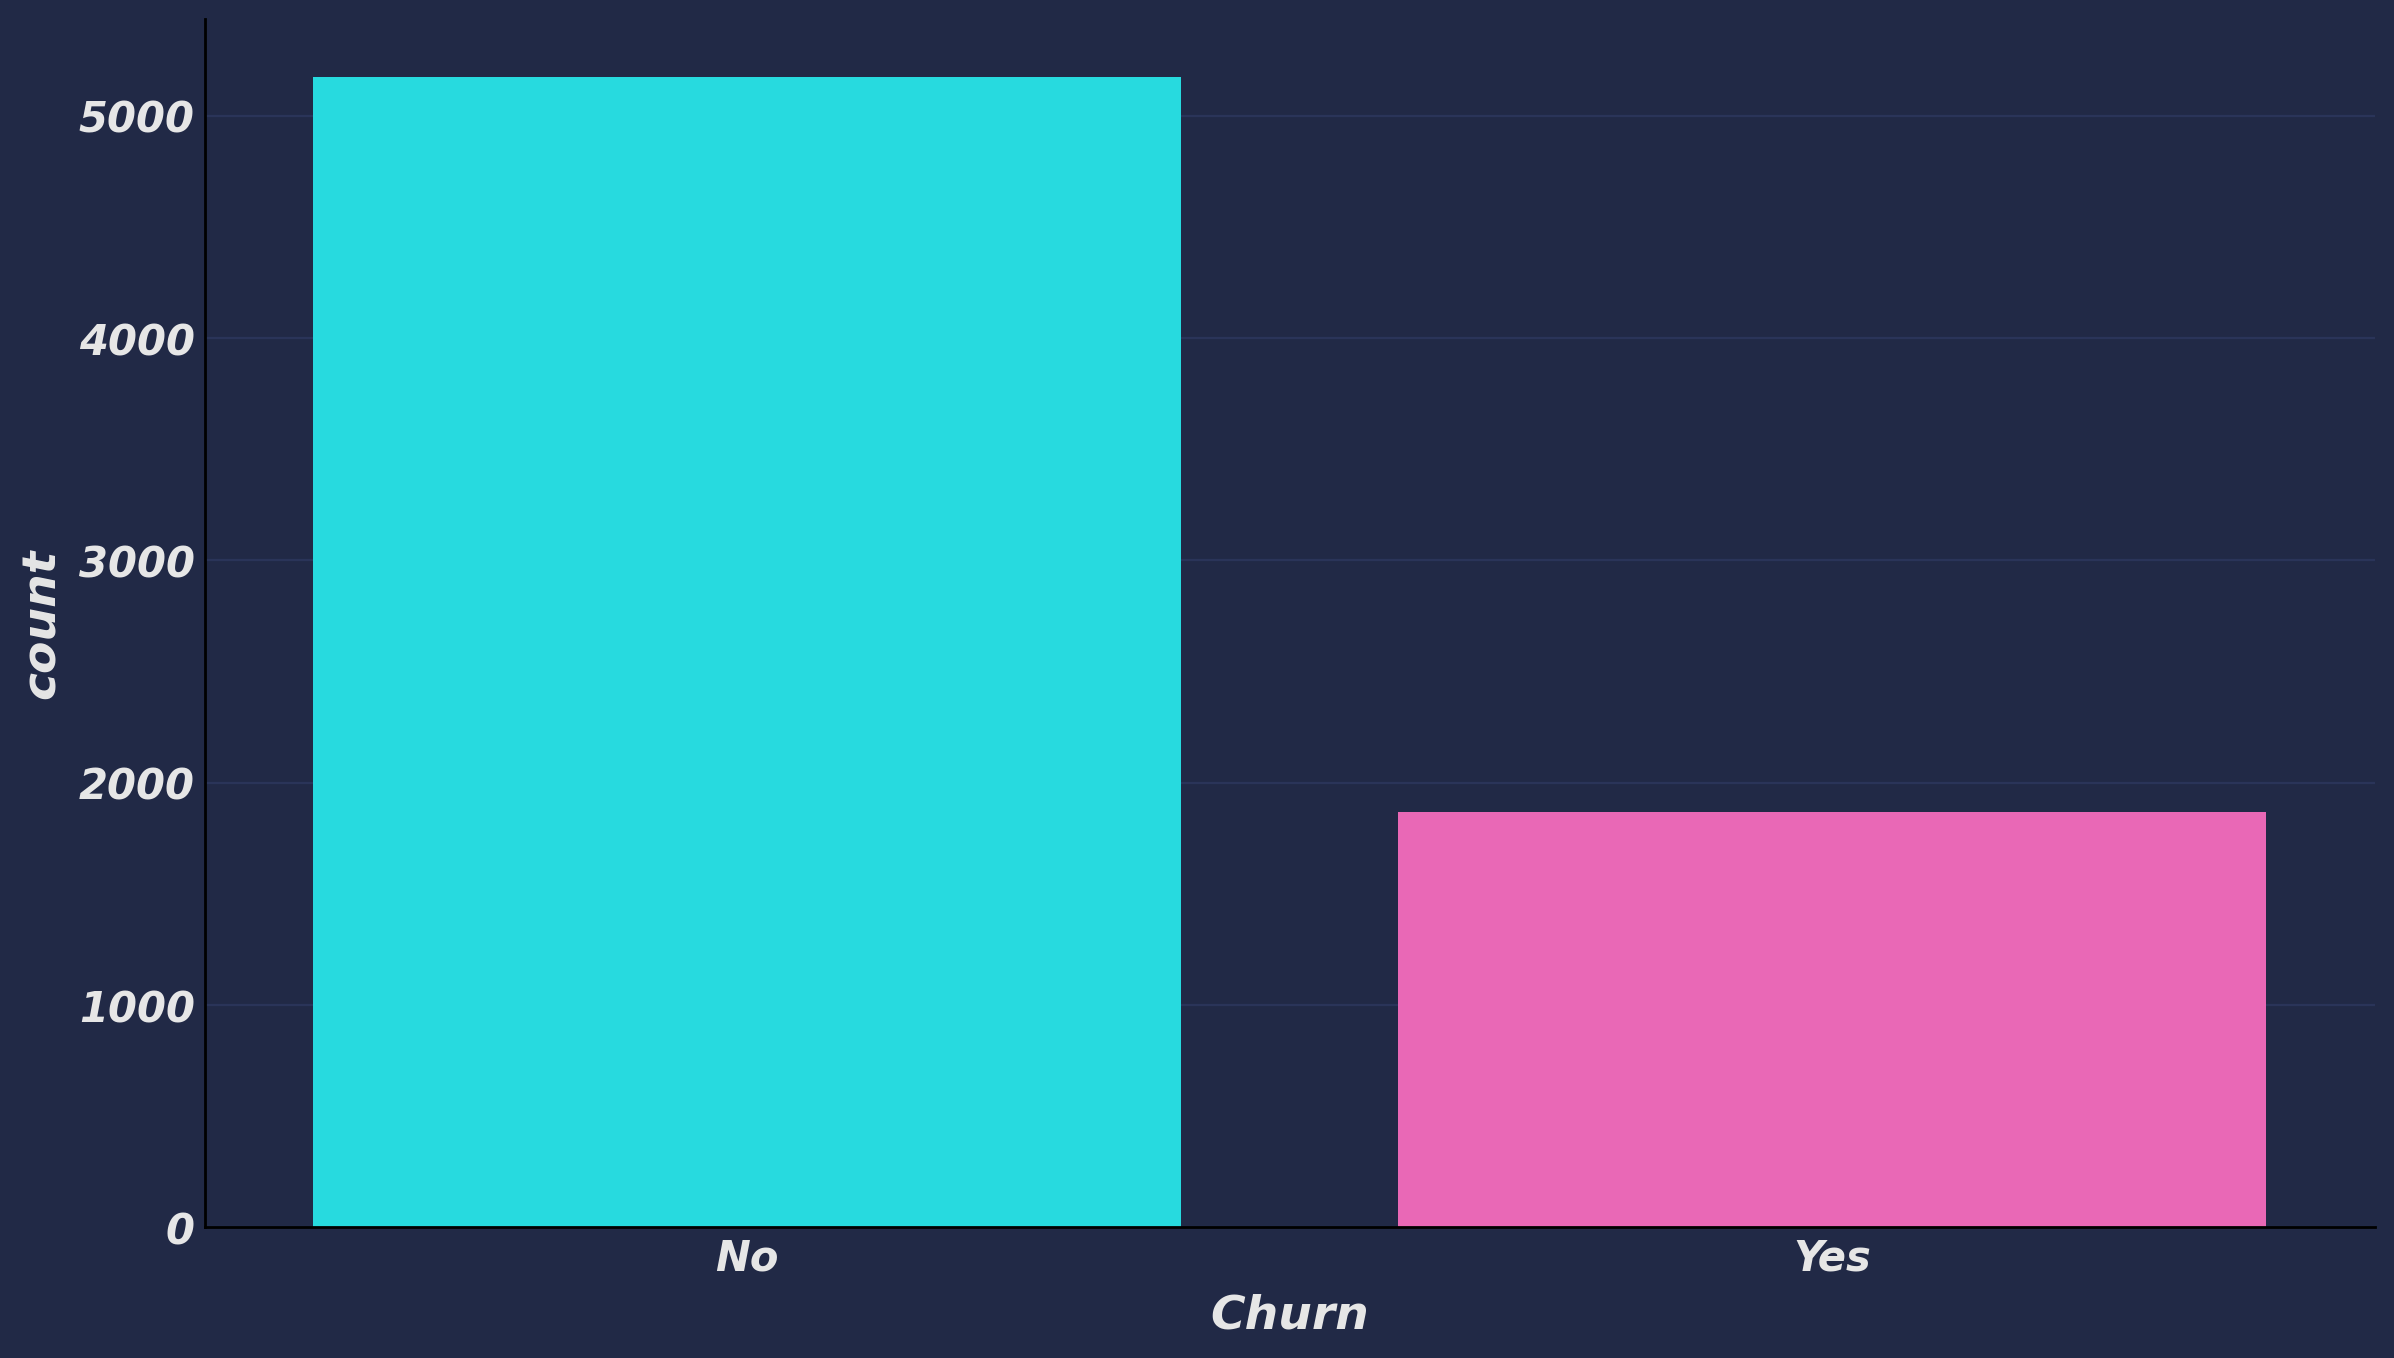

In [83]:
plt.figure(figsize=(14,8)) 
sns.countplot(df.Churn) 
df.Churn.value_counts()

In [77]:
df[df.TotalCharges == " "].shape[0]

11

In [4]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: x.replace(" ", "0")).astype("float") 

In [5]:
df.drop("customerID", axis=1, inplace=True) 

In [6]:
cater = df.select_dtypes(exclude="number").drop("Churn", axis=1) 
number = df.select_dtypes("number")

In [ ]:
# categorical features

In [7]:
cater

gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  
0              Electronic check  
1                  Mailed check  
2                  Mailed check  
3     Bank transfer (automatic)  
4              Electronic check  
...                         ...  
7038               Mailed check  
7039    Credit card (automatic)  
7040           Electronic check  
7041               Mailed check  
7042  Bank transfer (automatic)  

[7043 rows x 15 columns]

In [48]:
cater.describe()

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7043    7043       7043         7043          7043            7043   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3555    3641       4933         6361          3390            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  
count             7043            7043             7043              7043  
unique               3               3                2                 4  
top                 No  Month-to-month              Yes  Electronic check  
freq              2785            3875             4171              2365

In [97]:
for i in cater.columns:
    print(f"columns: {i} punya {df[i].nunique()}")
    print(f"{df[i].unique()} \n")

columns: gender punya 2
['Female' 'Male'] 

columns: Partner punya 2
['Yes' 'No'] 

columns: Dependents punya 2
['No' 'Yes'] 

columns: PhoneService punya 2
['No' 'Yes'] 

columns: MultipleLines punya 3
['No phone service' 'No' 'Yes'] 

columns: InternetService punya 3
['DSL' 'Fiber optic' 'No'] 

columns: OnlineSecurity punya 3
['No' 'Yes' 'No internet service'] 

columns: OnlineBackup punya 3
['Yes' 'No' 'No internet service'] 

columns: DeviceProtection punya 3
['No' 'Yes' 'No internet service'] 

columns: TechSupport punya 3
['No' 'Yes' 'No internet service'] 

columns: StreamingTV punya 3
['No' 'Yes' 'No internet service'] 

columns: StreamingMovies punya 3
['No' 'Yes' 'No internet service'] 

columns: Contract punya 3
['Month-to-month' 'One year' 'Two year'] 

columns: PaperlessBilling punya 2
['Yes' 'No'] 

columns: PaymentMethod punya 4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



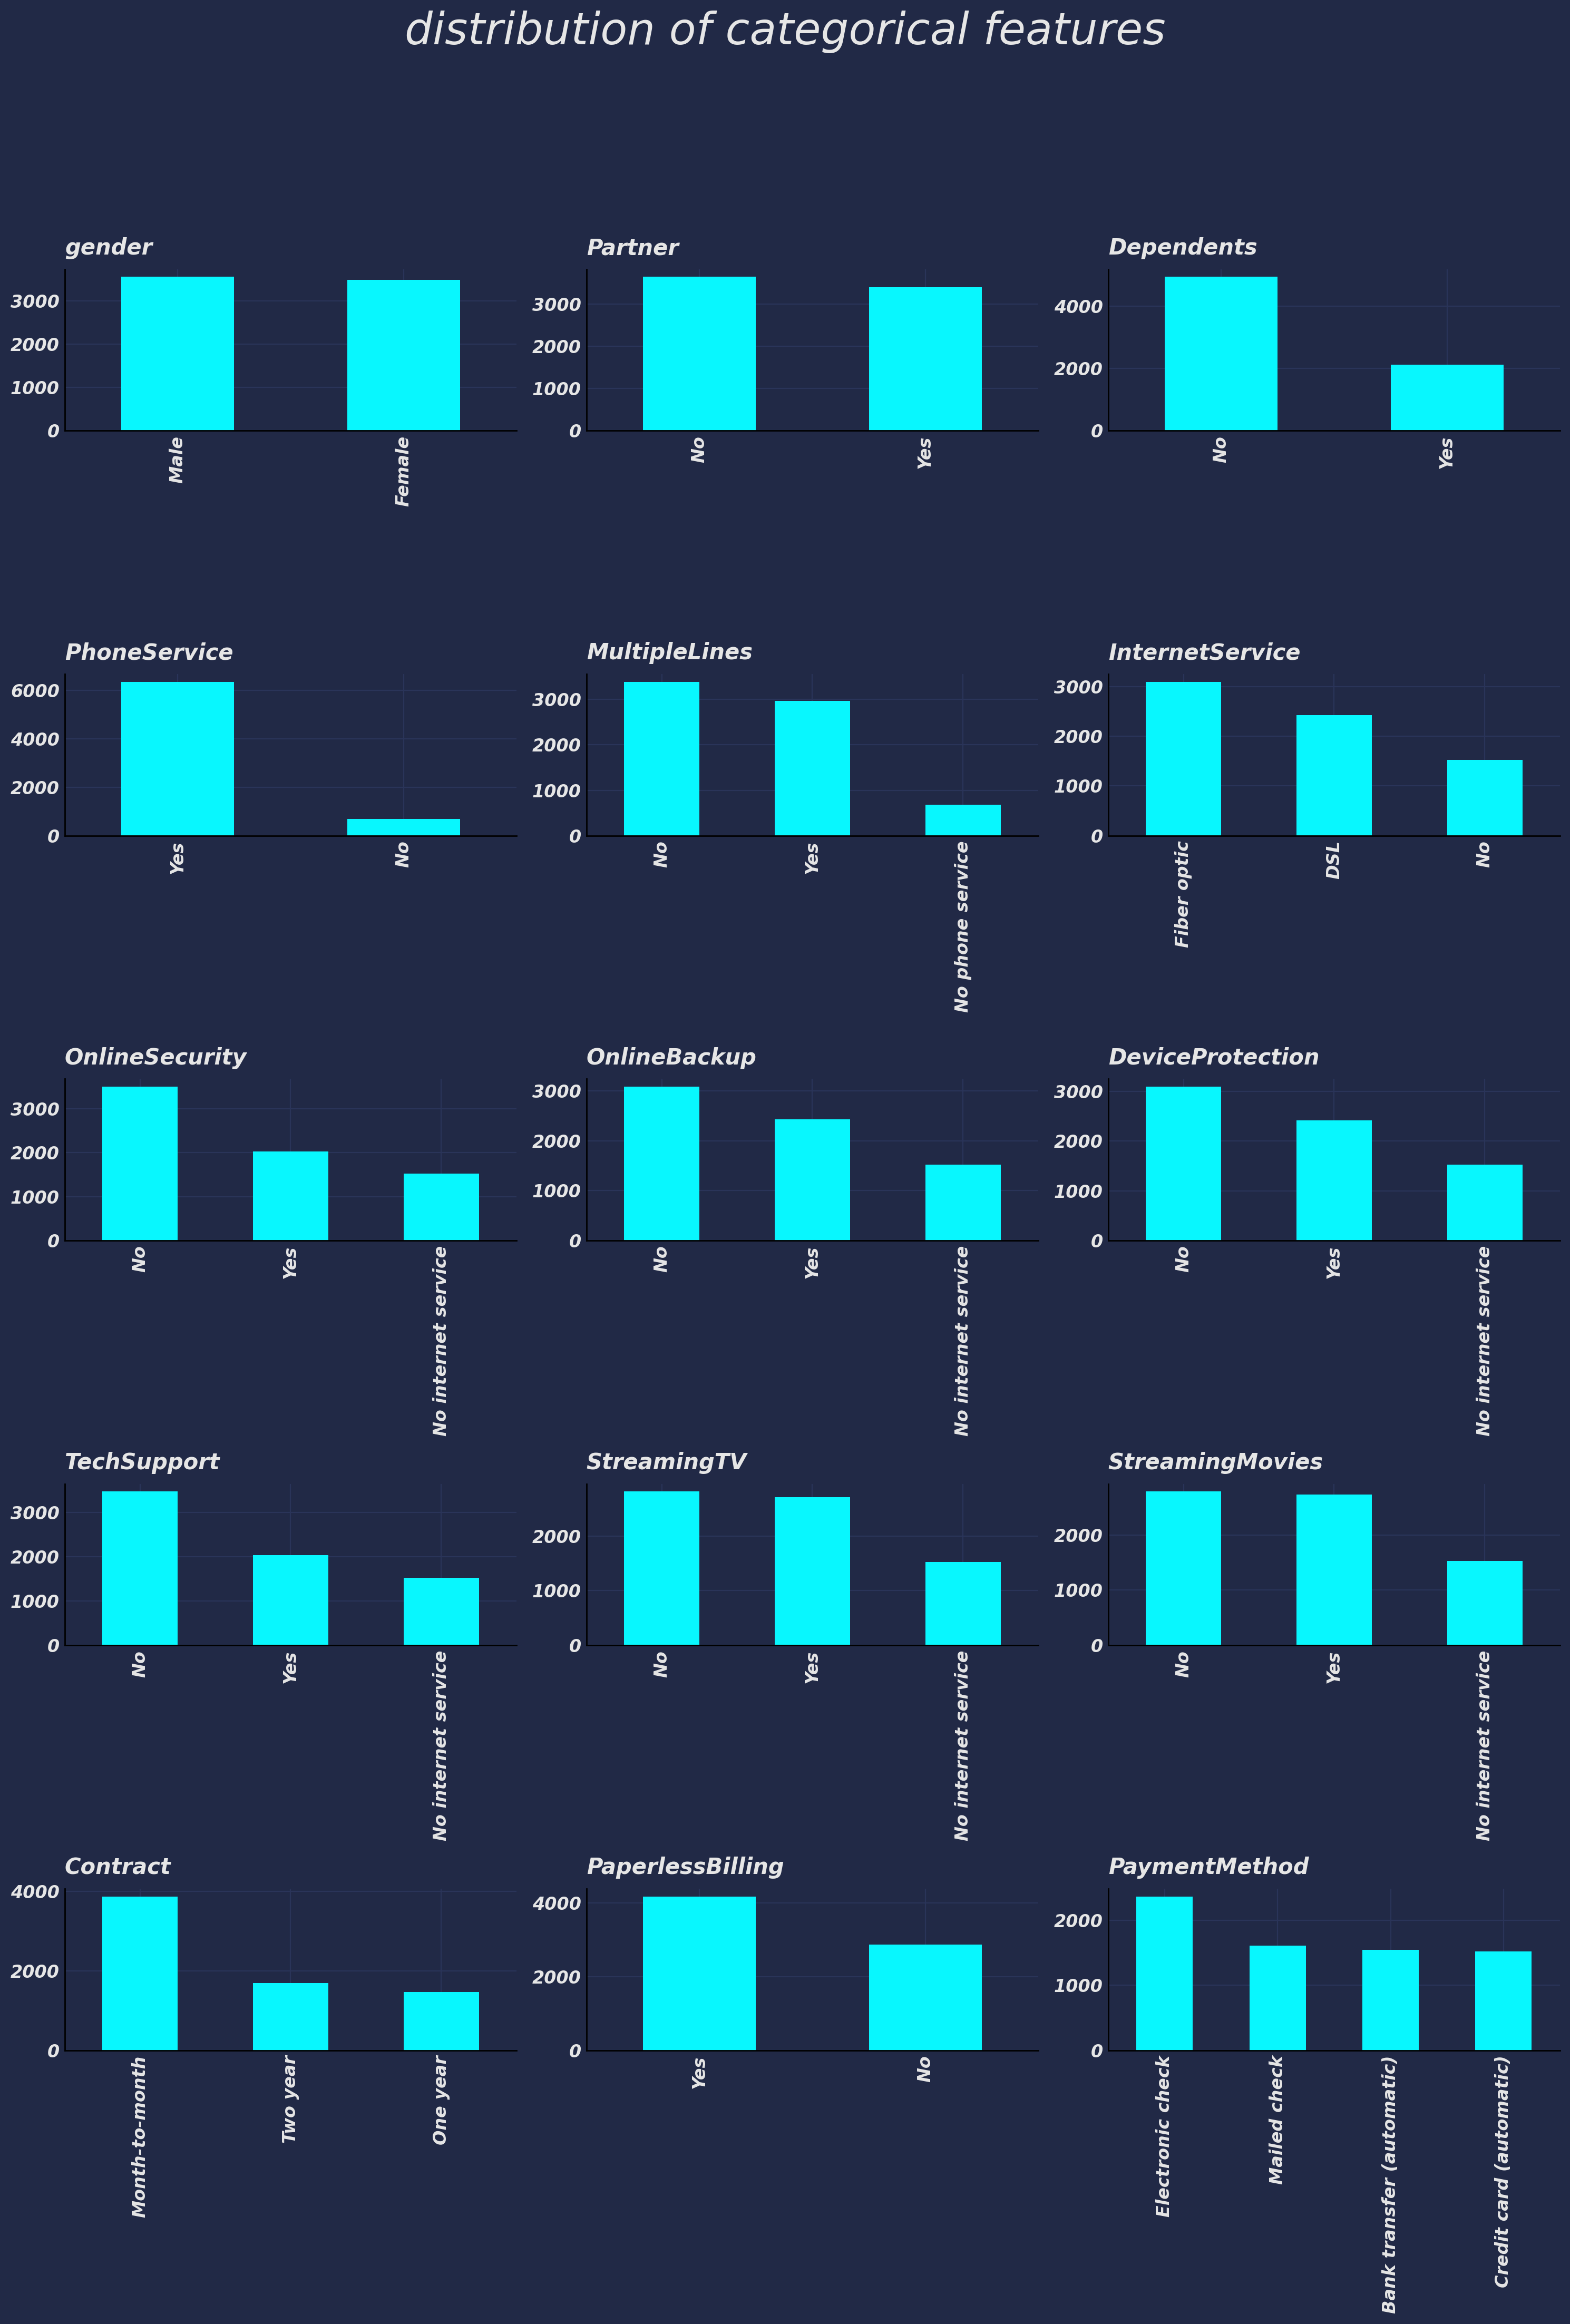

In [34]:
plt.figure(figsize=(15,20))

for i,j in enumerate(cater.columns): 
    plt.subplot(5, 3, i+1) 
    
    df[j].value_counts().plot(kind="bar") 
    plt.title(j) 
    
plt.tight_layout()
plt.suptitle("distribution of categorical features", size=30, y=1.1) 
plt.show() 

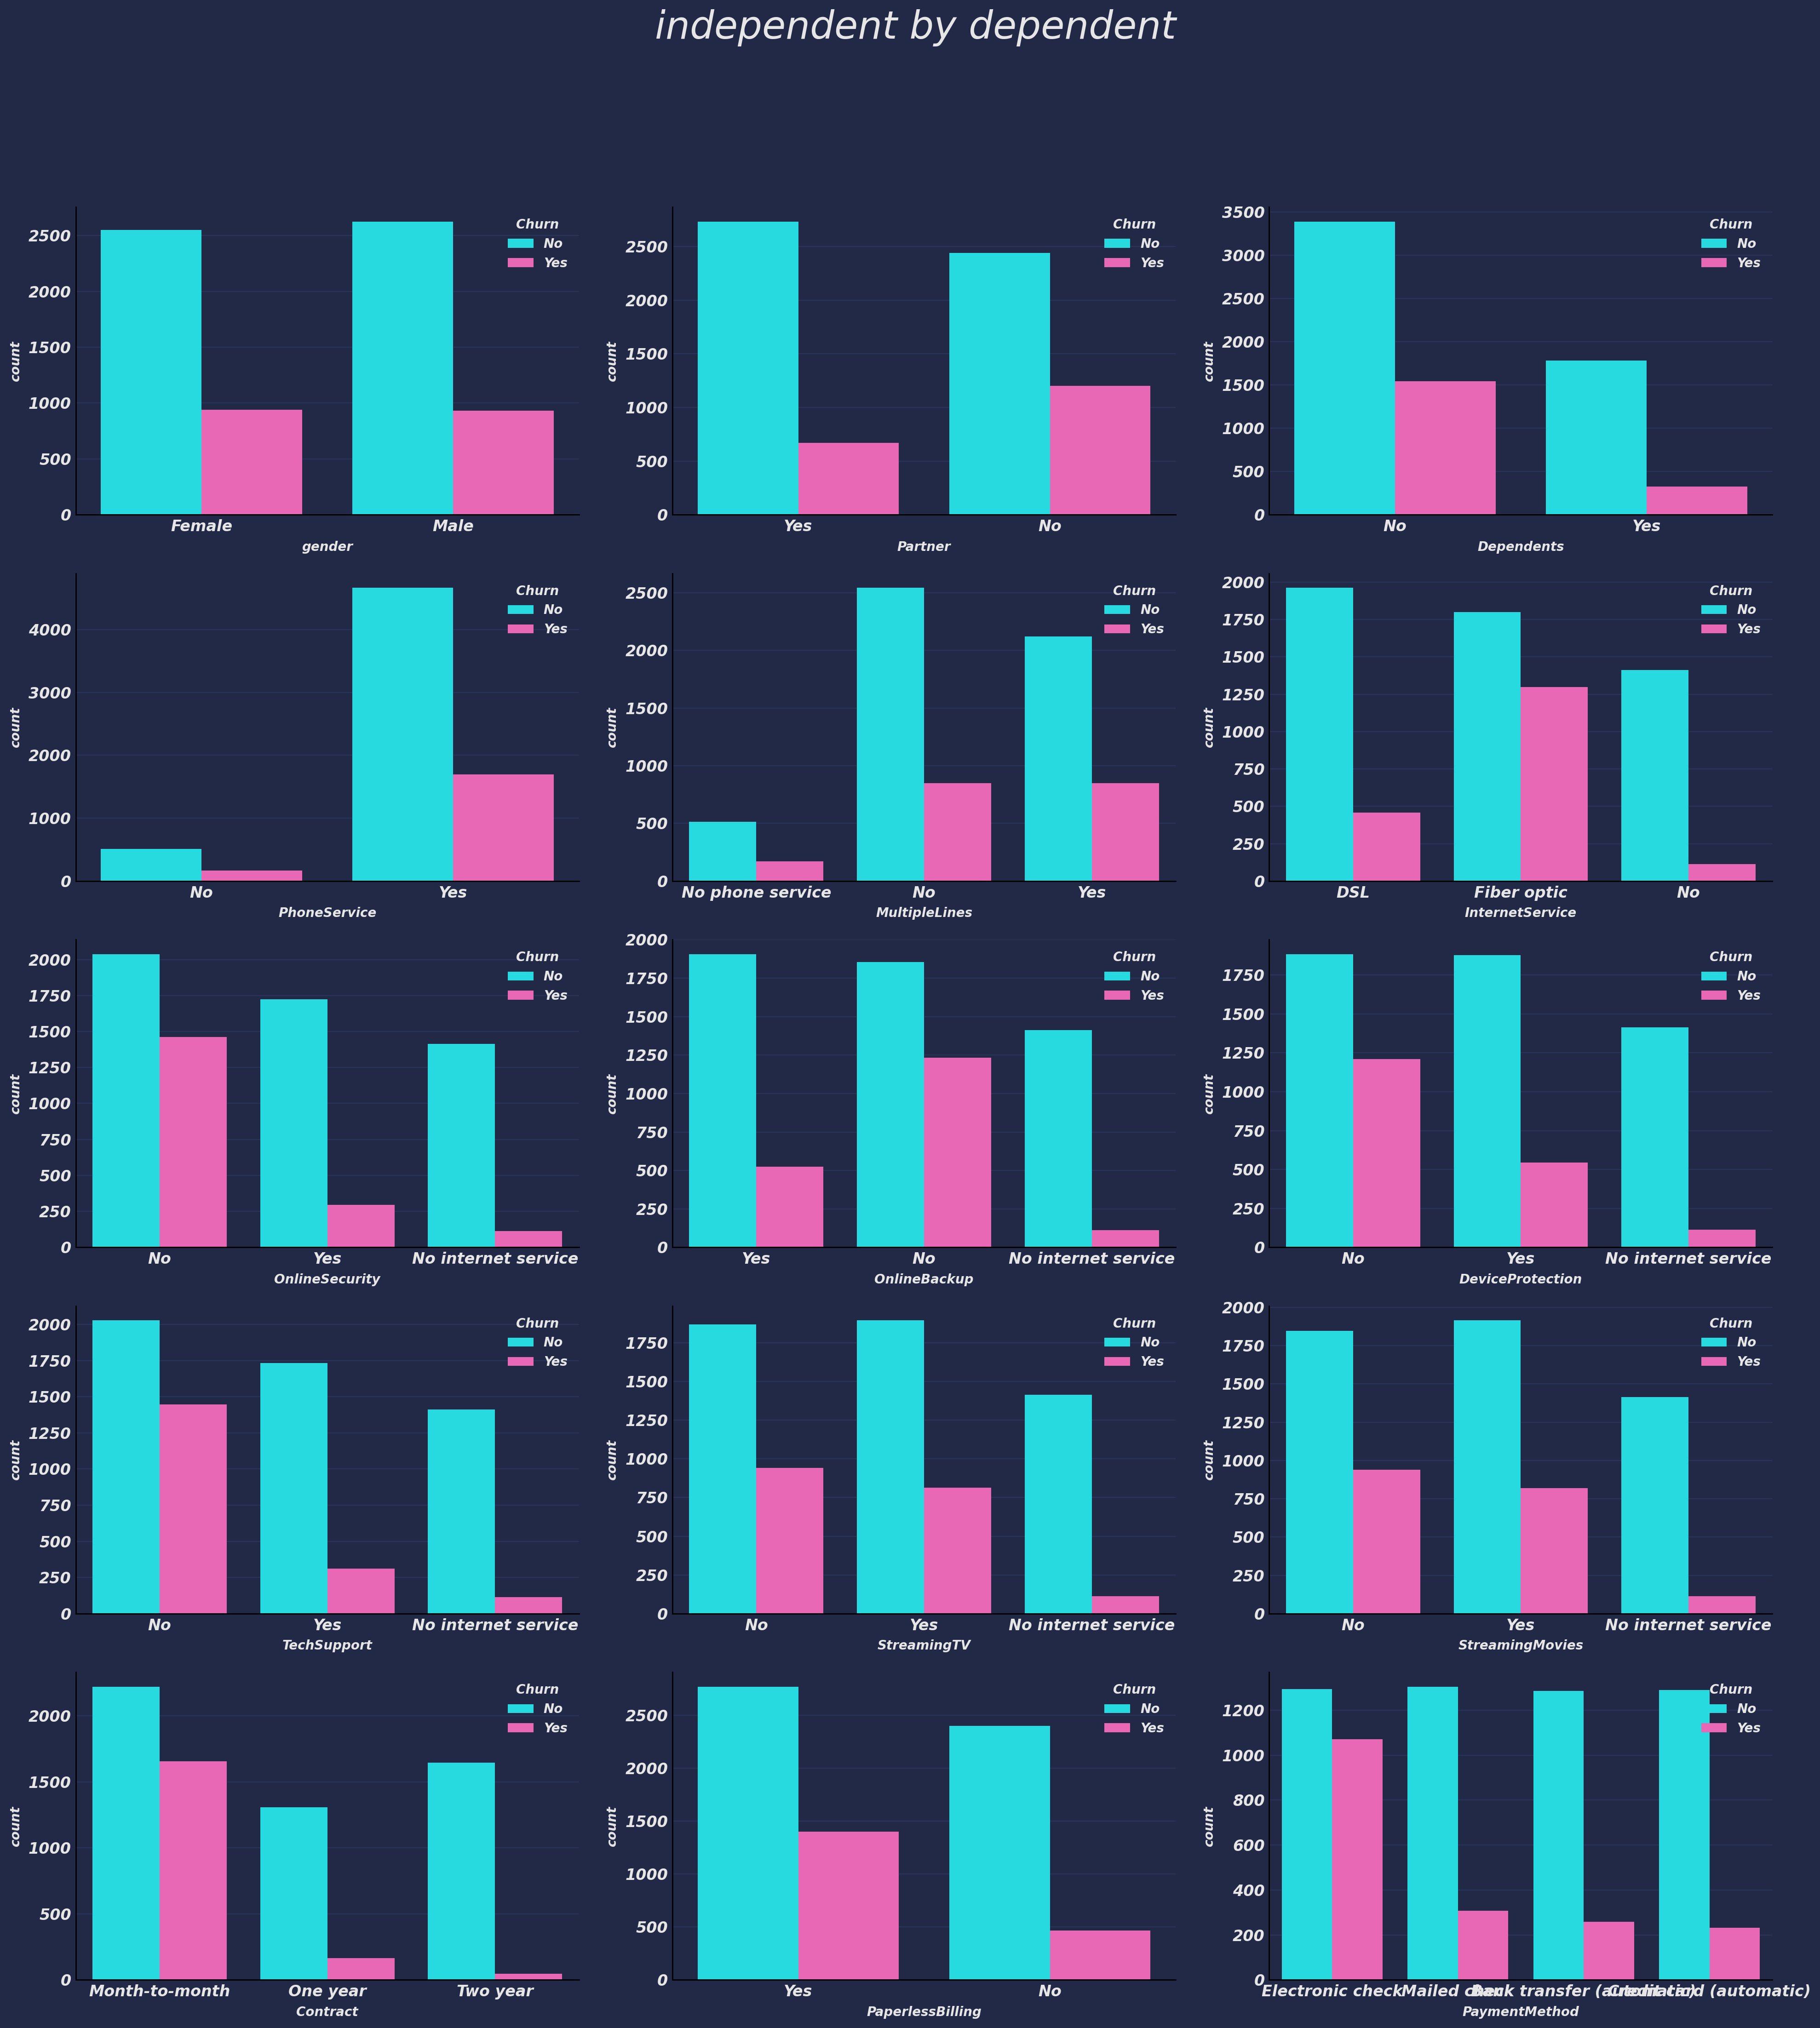

In [32]:
plt.figure(figsize=(20,20))

for i,j in enumerate(cater.columns): 
    plt.subplot(5, 3, i+1) 
    
    sns.countplot(df[j], hue=df["Churn"]) 
    
plt.tight_layout()
plt.suptitle("independent by dependent", size=30, y=1.1) 
plt.show() 

In [ ]:
# numerical feature

In [35]:
number

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]

In [51]:
number.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

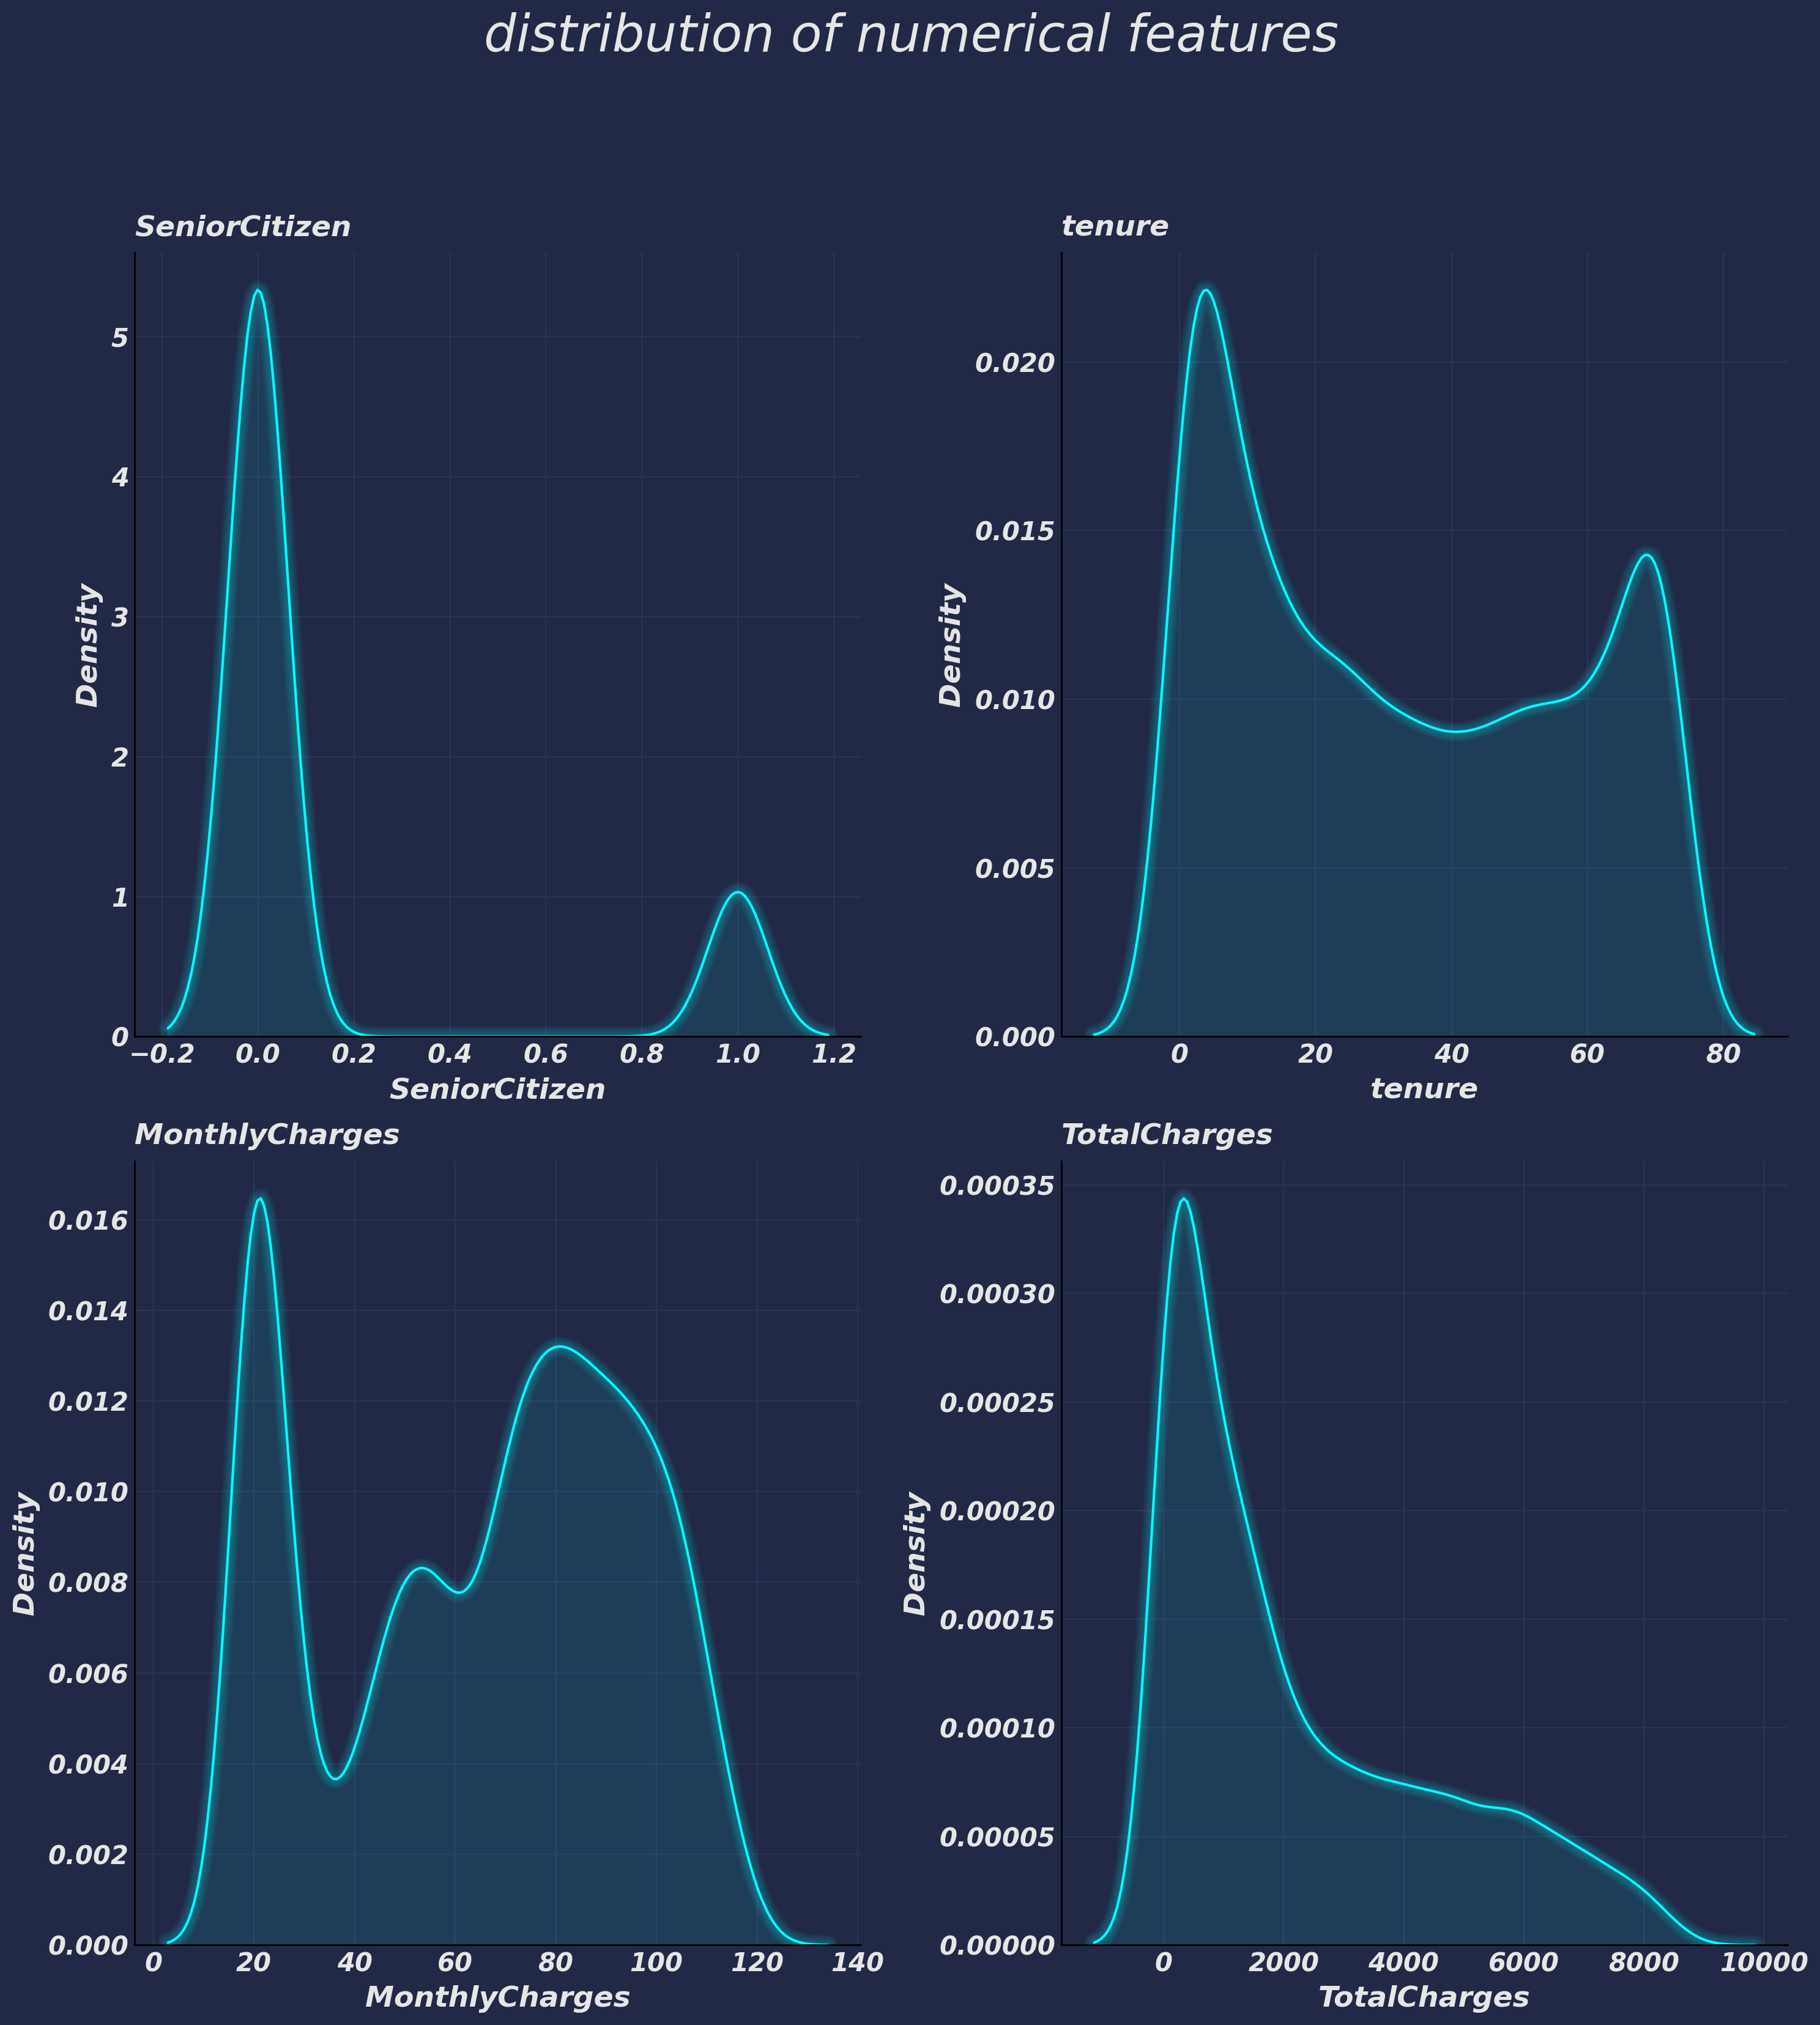

In [85]:
plt.figure(figsize=(15,15))

for i,j in enumerate(number.columns): 
    plt.subplot(2, 2, i+1) 
    
    sns.distplot(df[j], hist=False)
    plt.title(j) 
    mplcyberpunk.add_glow_effects() 
    
plt.tight_layout()
plt.suptitle("distribution of numerical features", size=30, y=1.1) 
plt.show() 

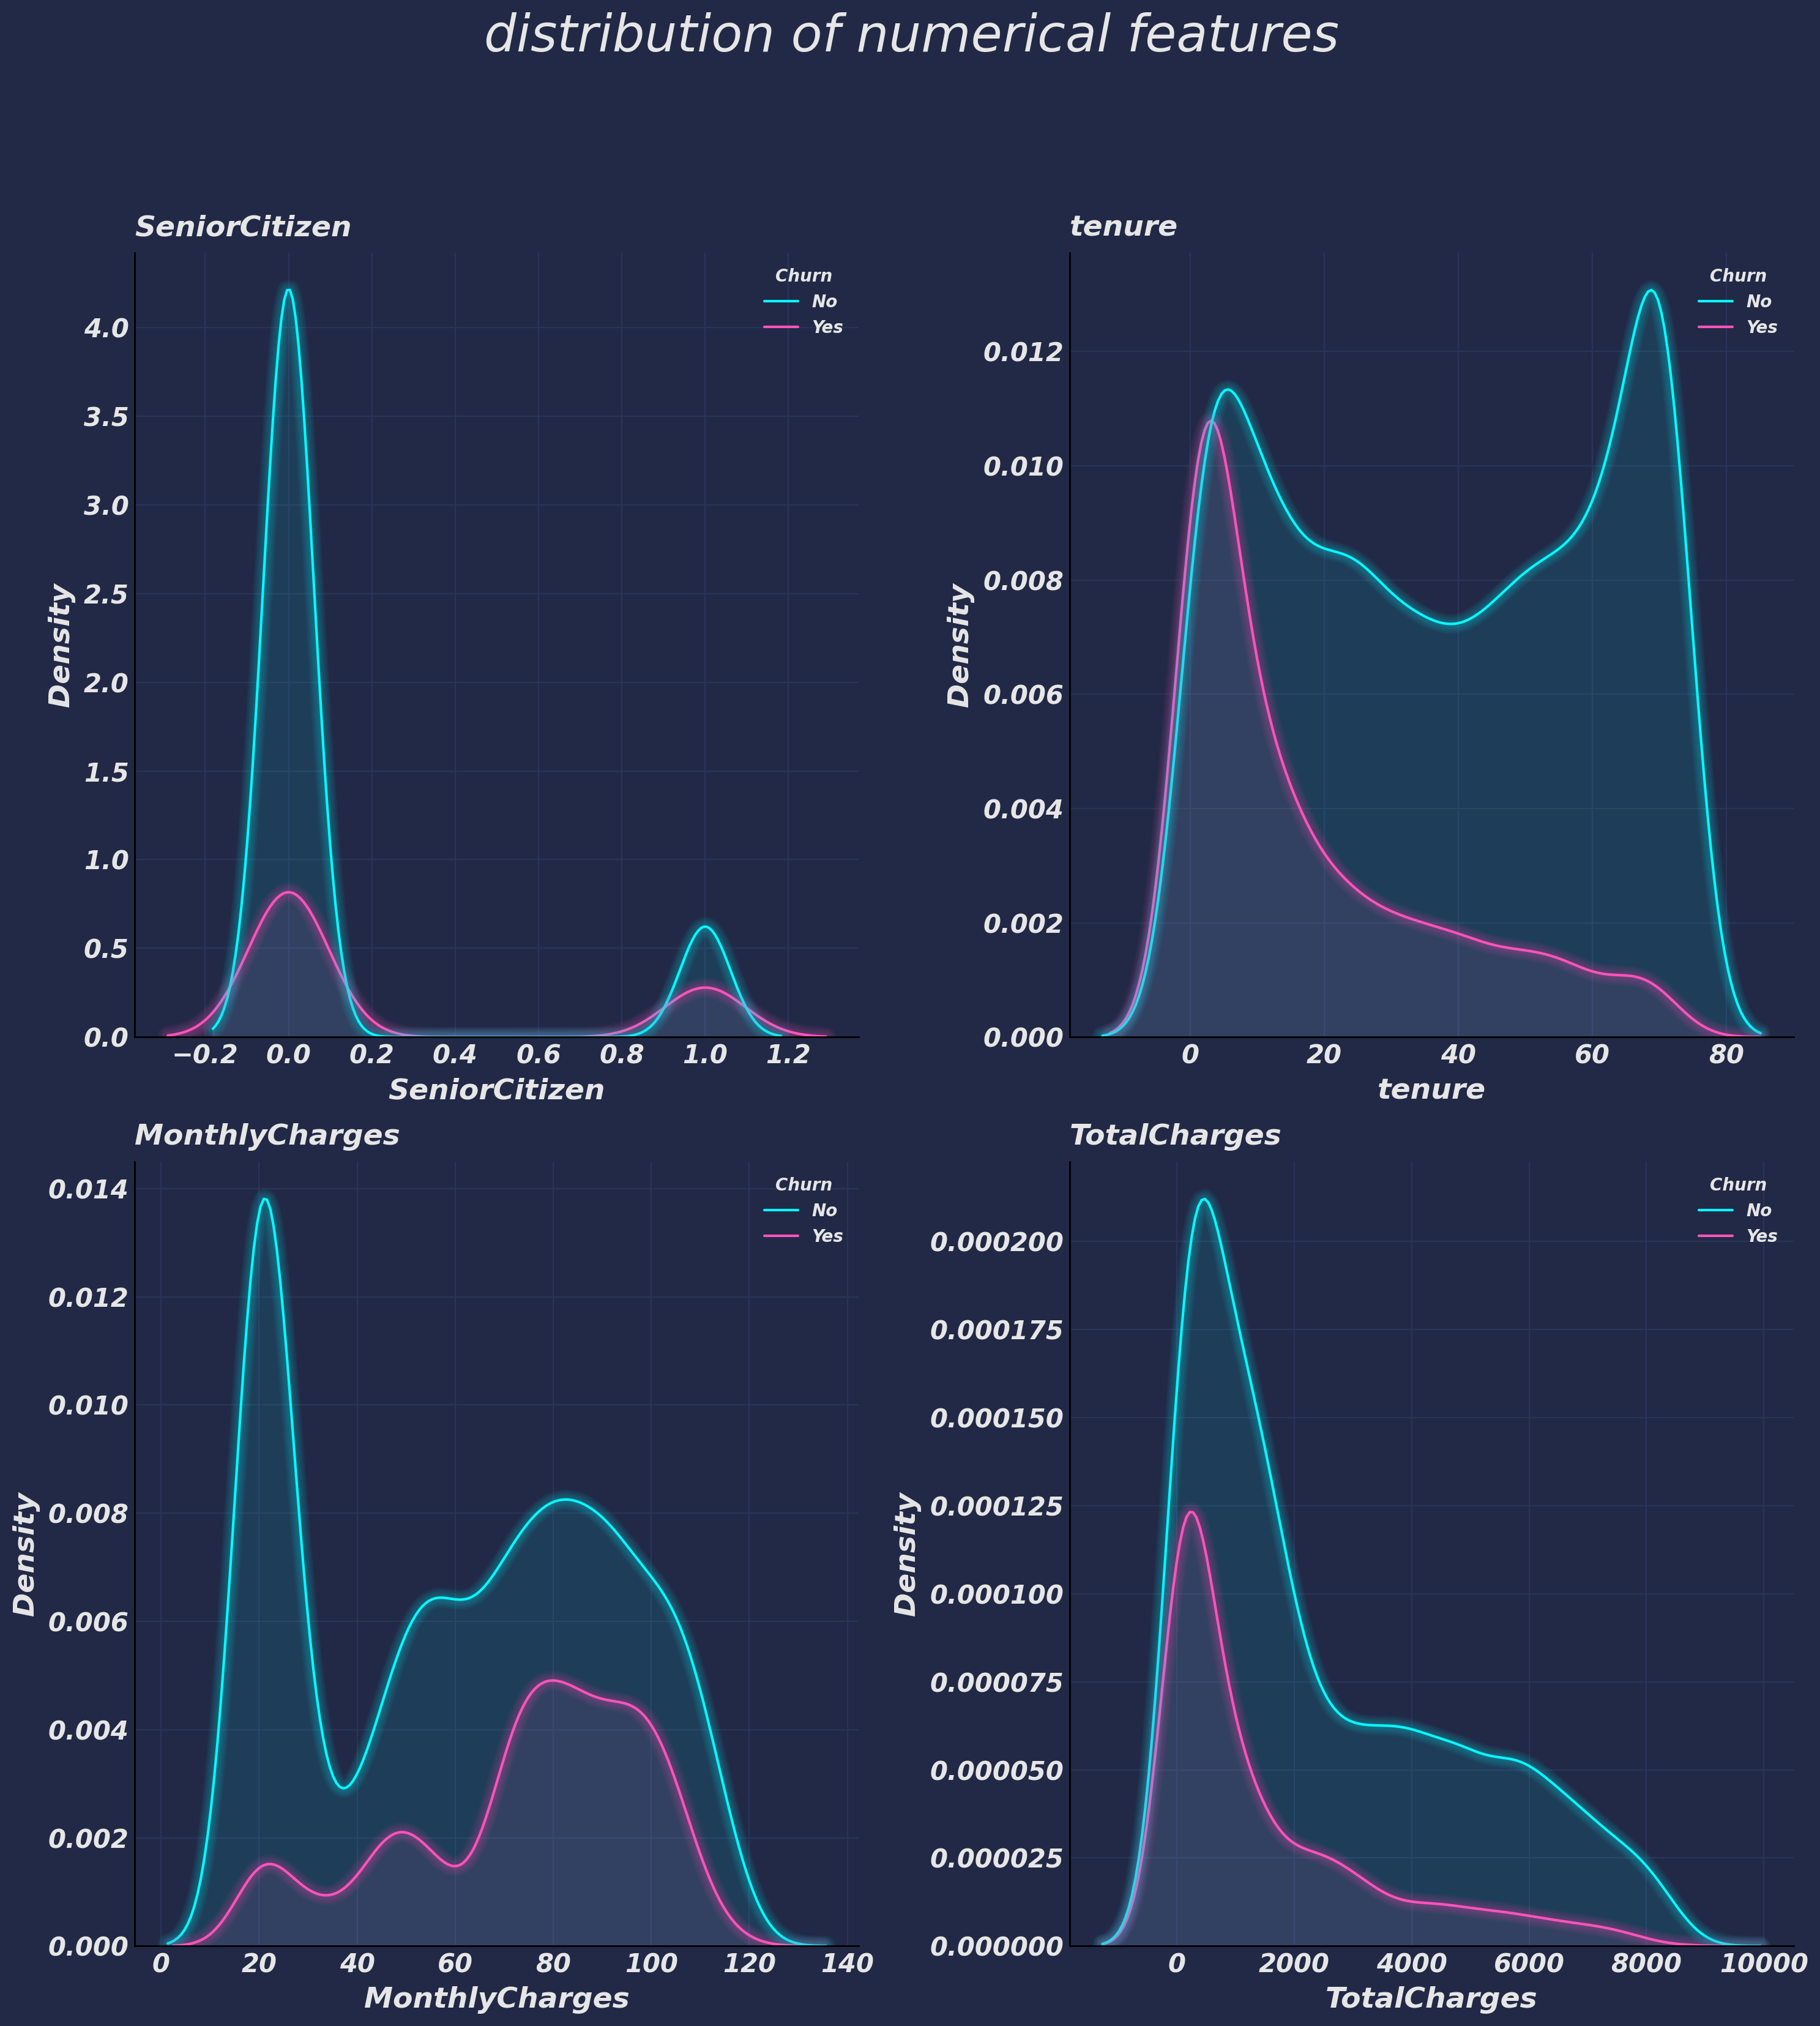

In [84]:
plt.figure(figsize=(15,15))

for i,j in enumerate(number.columns): 
    plt.subplot(2, 2, i+1) 
    
    sns.kdeplot(df[j], hue=df["Churn"]) 
    plt.title(j)
    mplcyberpunk.add_glow_effects() 
    
plt.tight_layout()
plt.suptitle("distribution of numerical features", size=30, y=1.1) 
plt.show() 

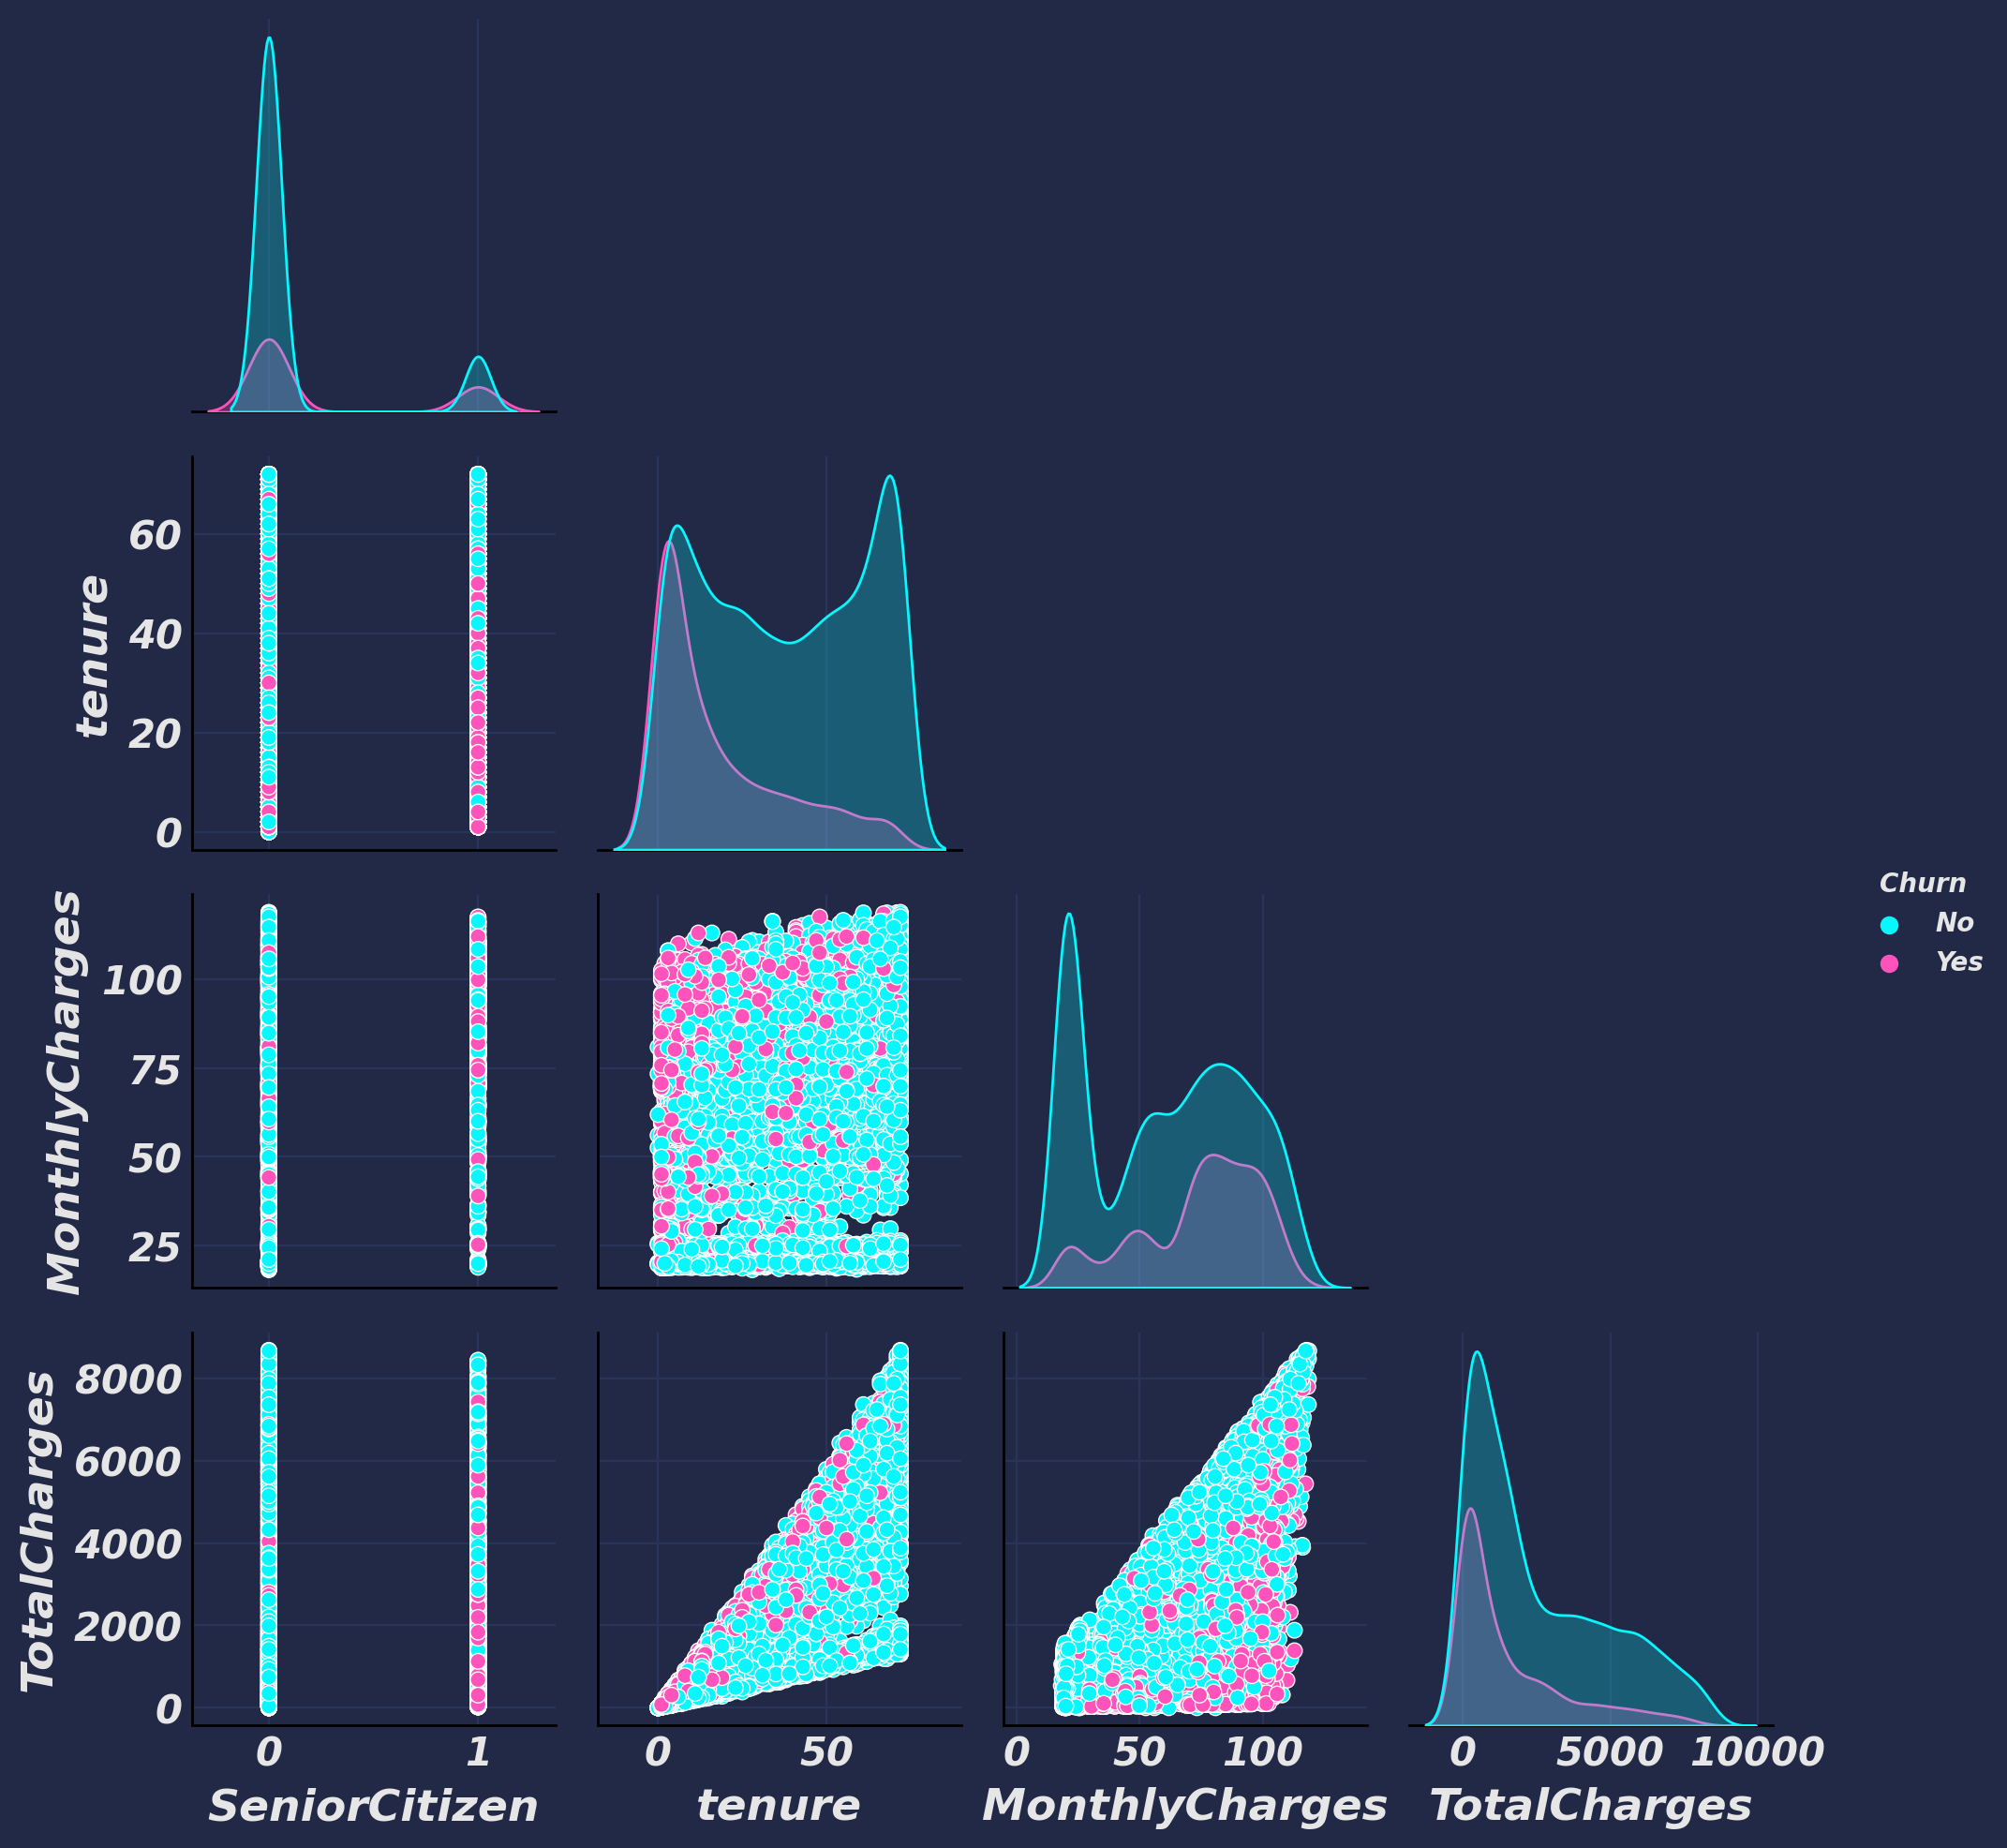

In [17]:
sns.pairplot(df,hue="Churn",corner=True) 

In [87]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [94]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=10) 

In [100]:
print(train.shape)
print(test.shape)
print("")
print(train.isnull().any().sum())
print(test.isnull().any().sum())
print("")
print(train.duplicated().sum())

(5617, 20)
(1409, 20)

0
0

0


In [99]:
train.drop_duplicates(inplace=True) 

In [101]:
train.to_csv("train_churn(clean).csv",index=False)
test.to_csv("test_churn(clean).csv",index=False)